In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("New1.csv")

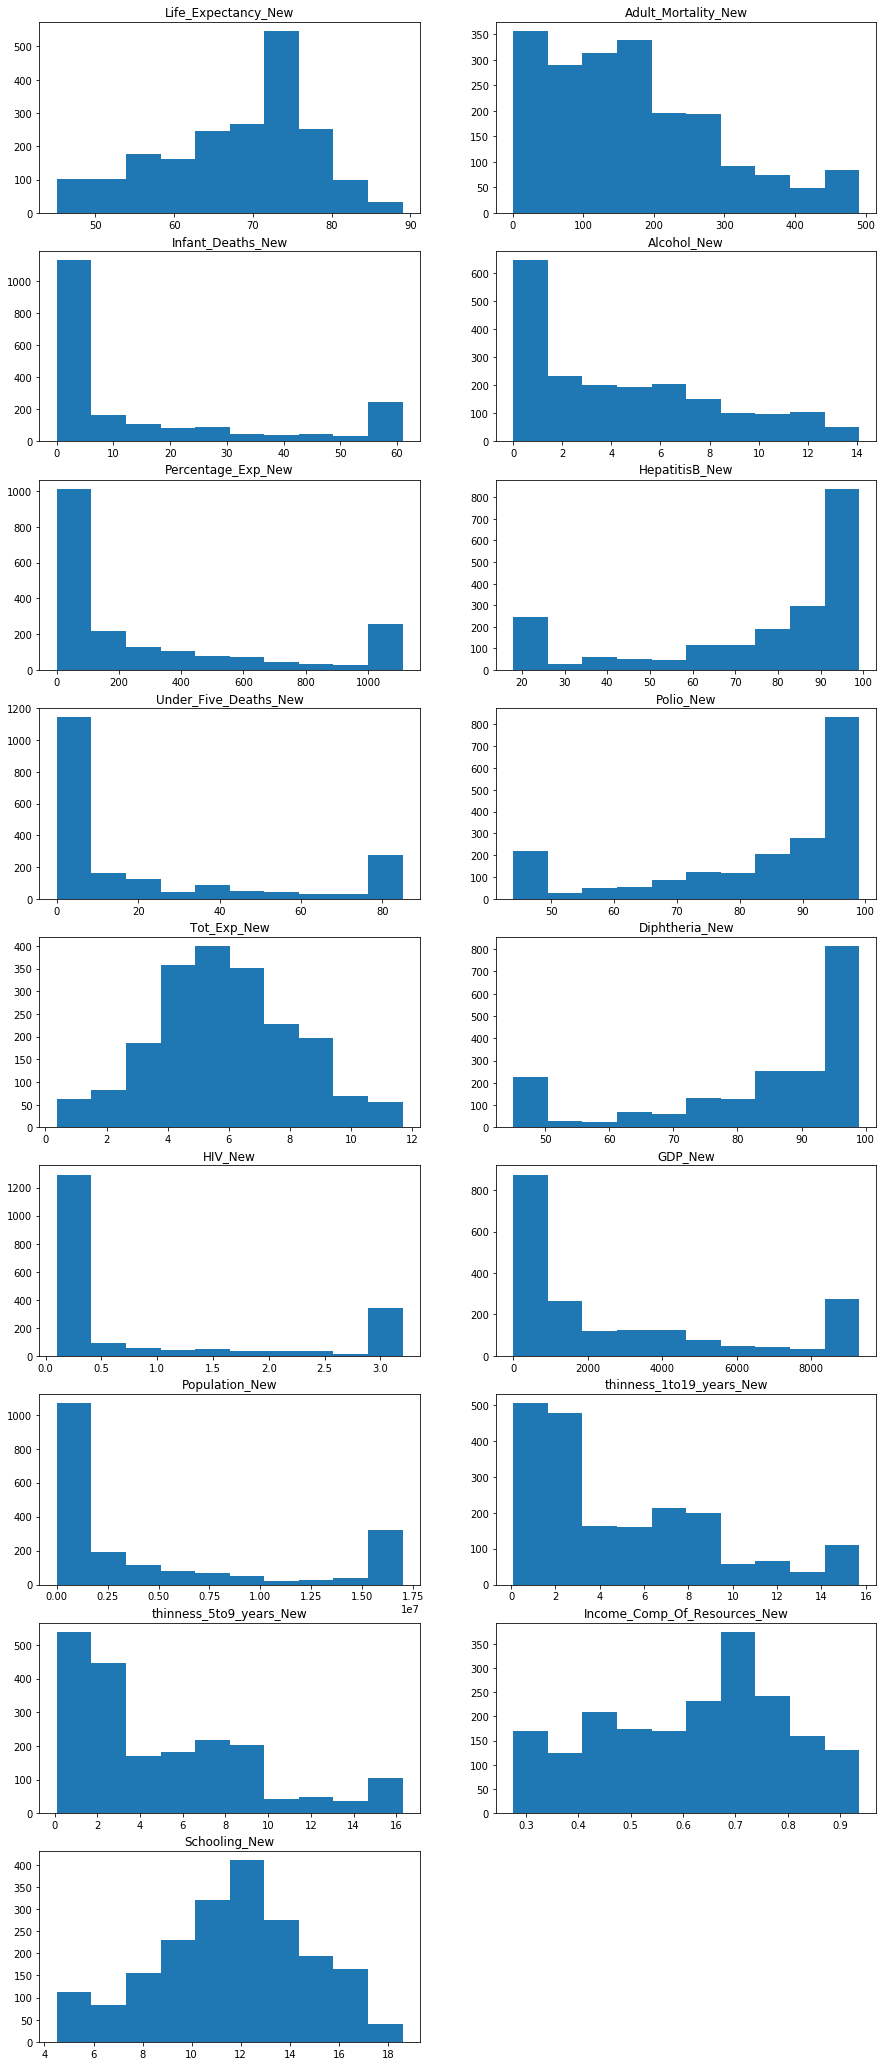

In [3]:
all_col = ['Life_Expectancy_New','Adult_Mortality_New','Infant_Deaths_New','Alcohol_New','Percentage_Exp_New','HepatitisB_New','Under_Five_Deaths_New','Polio_New',
         'Tot_Exp_New','Diphtheria_New','HIV_New','GDP_New',
         'Population_New','thinness_1to19_years_New',
         'thinness_5to9_years_New','Income_Comp_Of_Resources_New',
         'Schooling_New']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(df[all_col[i]])
    plt.title(all_col[i])

plt.show()

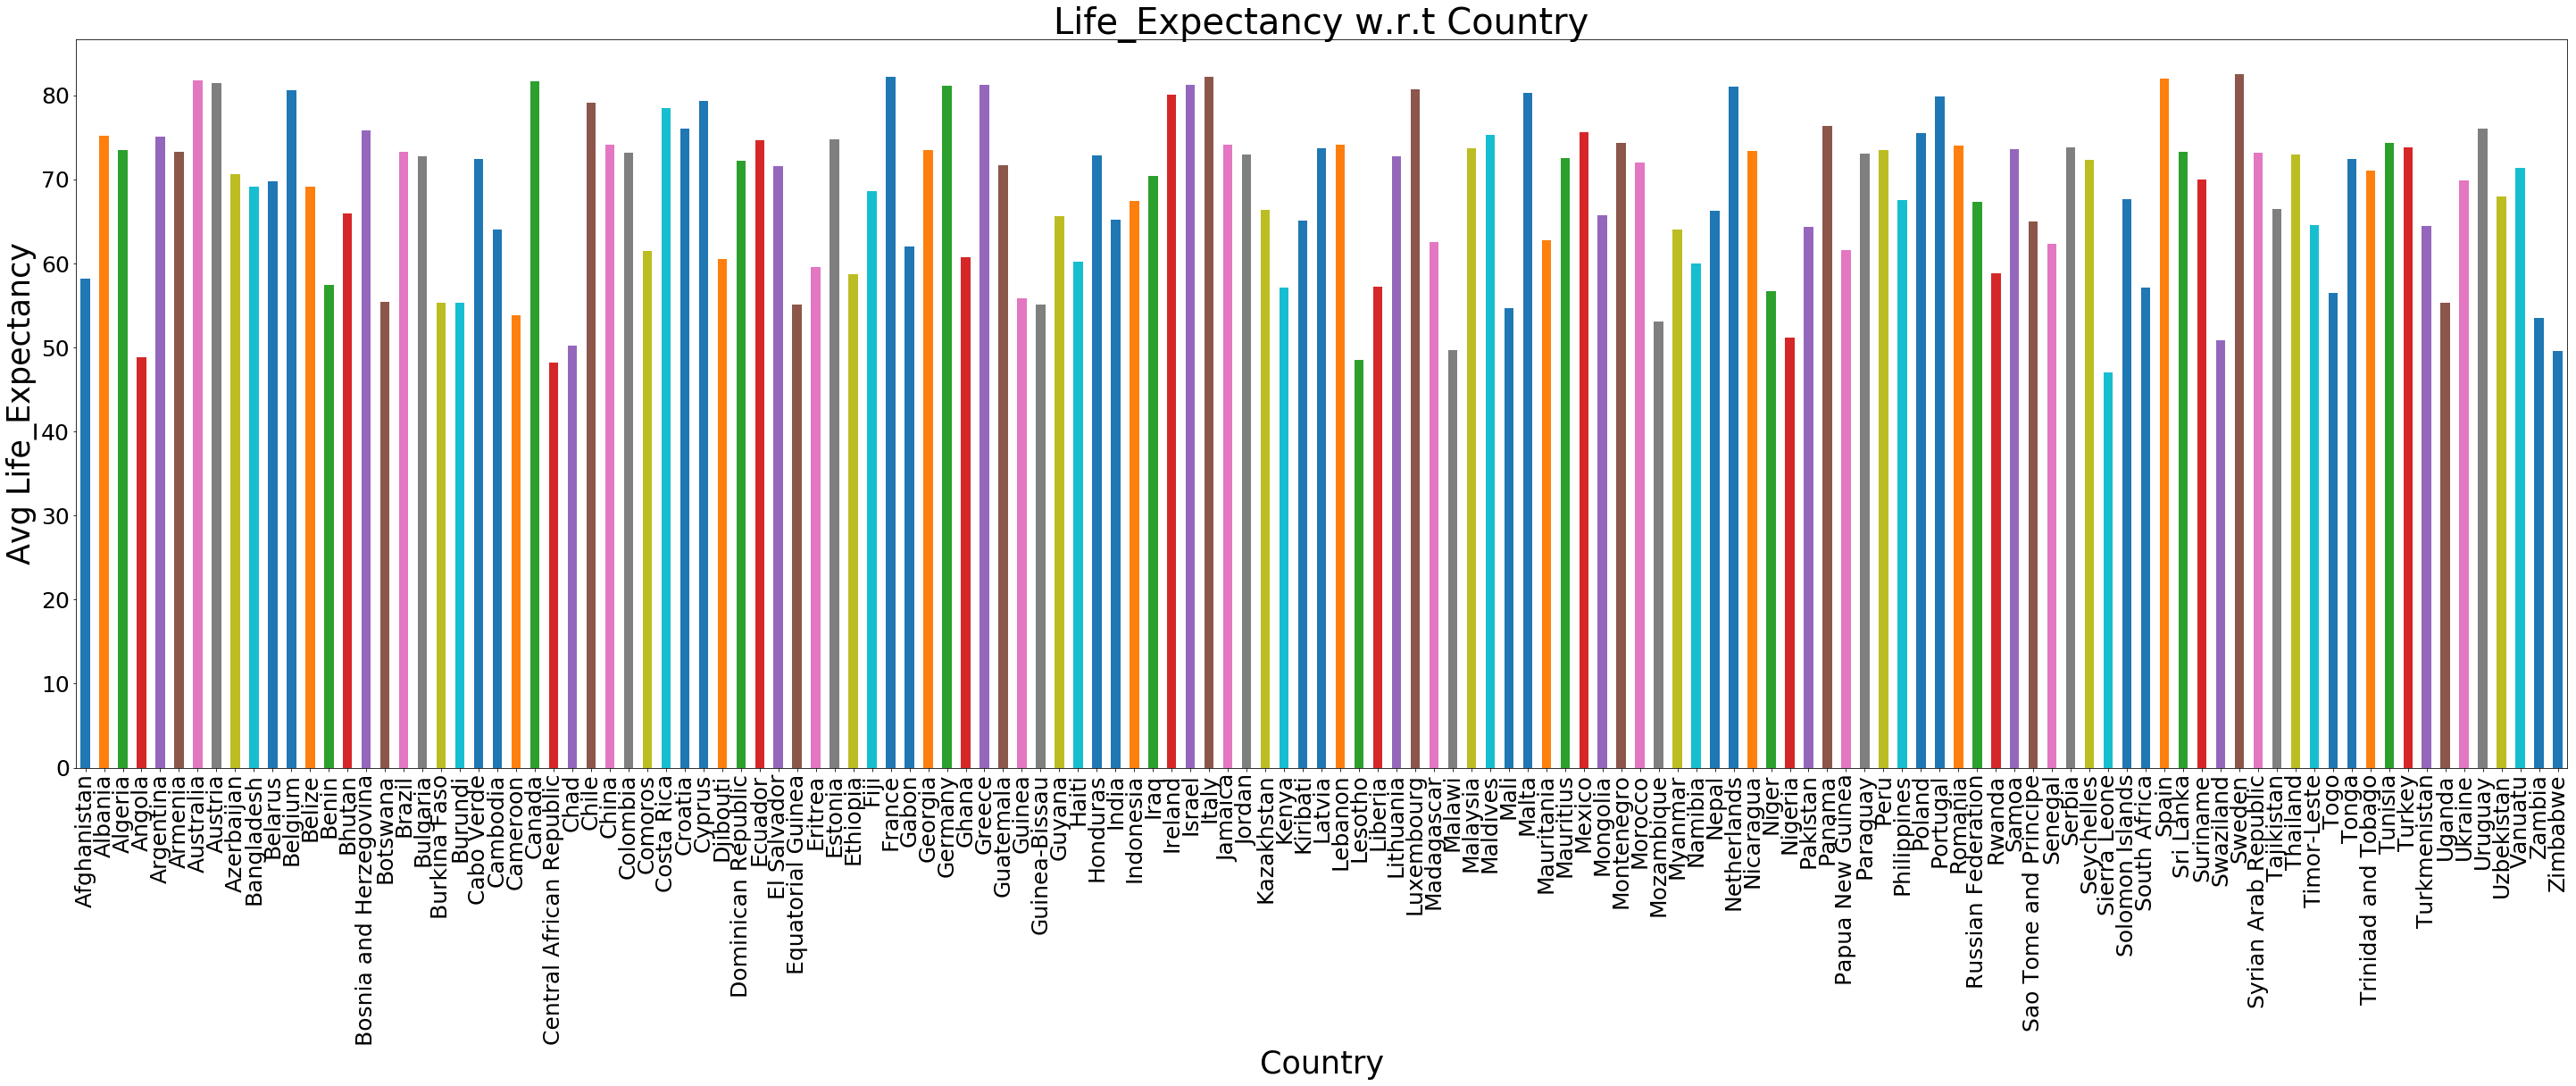

In [4]:
# Life_Expectancy w.r.t Country using bar plot.
Life_Exp_country = df.groupby('Country')['Life_Expectancy_New'].mean()
Life_Exp_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

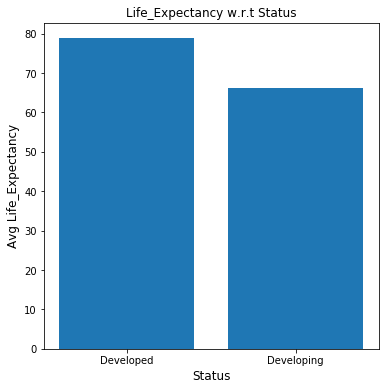

In [5]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life_Expectancy_New'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

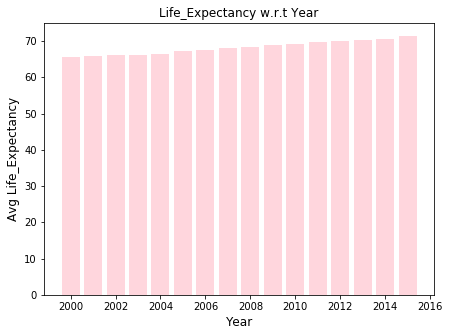

In [6]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index,df.groupby('Year')['Life_Expectancy_New'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

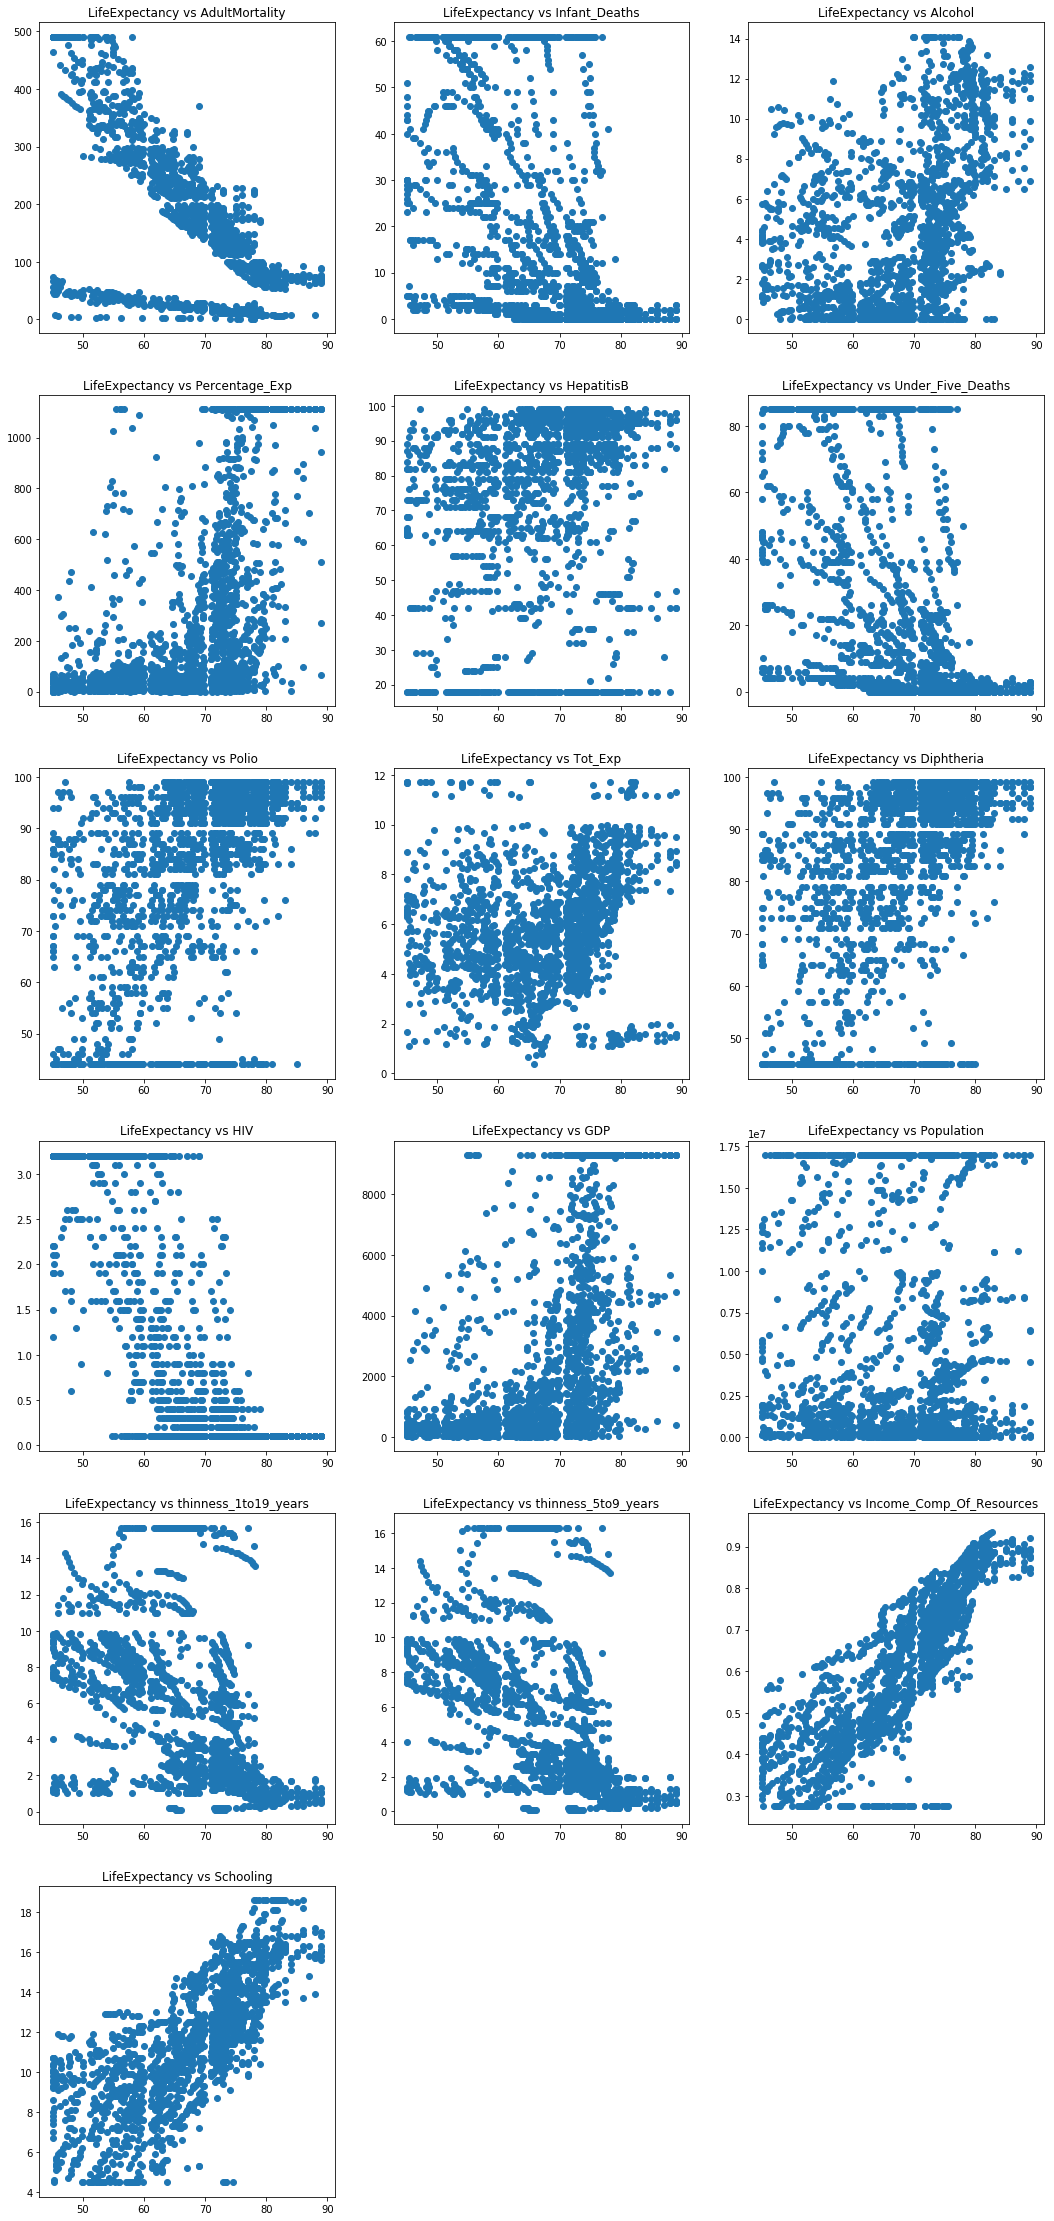

In [7]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(df["Life_Expectancy_New"], df["Adult_Mortality_New"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(df["Life_Expectancy_New"], df["Infant_Deaths_New"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(df["Life_Expectancy_New"], df["Alcohol_New"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(df["Life_Expectancy_New"], df["Percentage_Exp_New"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(df["Life_Expectancy_New"], df["HepatitisB_New"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(df["Life_Expectancy_New"], df["Under_Five_Deaths_New"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(df["Life_Expectancy_New"], df["Polio_New"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(df["Life_Expectancy_New"],df["Tot_Exp_New"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(df["Life_Expectancy_New"], df["Diphtheria_New"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(df["Life_Expectancy_New"], df["HIV_New"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(df["Life_Expectancy_New"], df["GDP_New"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(df["Life_Expectancy_New"], df["Population_New"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(df["Life_Expectancy_New"], df["thinness_1to19_years_New"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(df["Life_Expectancy_New"], df["thinness_5to9_years_New"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(df["Life_Expectancy_New"], df["Income_Comp_Of_Resources_New"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(df["Life_Expectancy_New"], df["Schooling_New"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

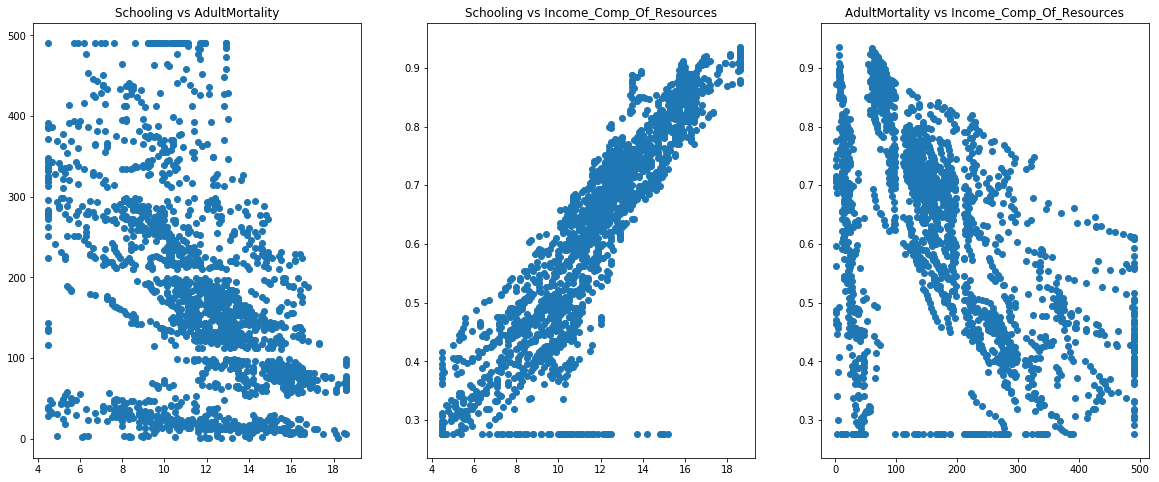

In [8]:
# observe if there is any correlation among the variables that are related to the target variable(winsorized_Life_Expectancy).

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(df["Schooling_New"], df["Adult_Mortality_New"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(df["Schooling_New"], df["Income_Comp_Of_Resources_New"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(df["Adult_Mortality_New"], df["Income_Comp_Of_Resources_New"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

In [10]:

round(df[['Status','Life_Expectancy_New']].groupby(['Status']).mean(),2)

,Life_Expectancy_New
Status,
Developed,78.83
Developing,66.19


In [11]:
import scipy.stats as stats
stats.ttest_ind(df.loc[df['Status']=='Developed','Life_Expectancy_New'],df.loc[df['Status']=='Developing','Life_Expectancy_New'])

Ttest_indResult(statistic=23.02232052151534, pvalue=3.793119218299665e-104)